# Fake news Detection

### Importing required library



In [1]:
import pandas as pd
import numpy as np


In [13]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import string
from sklearn.linear_model import LogisticRegression
import re
import string
from nltk.corpus import stopwords
from textblob import TextBlob
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ModuleNotFoundError: No module named 'PIL'

### Inserting fake and real dataset

In [2]:
import re
import re
import string
from nltk.corpus import stopwords
from textblob import TextBlob

In [3]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [4]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [6]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [7]:
df_true["text"] = df_true["text"].apply(wordopt)

In [8]:
df_fake["text"] = df_fake["text"].apply(wordopt)

Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [11]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [12]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [9]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((23471, 4), (21407, 4))

In [16]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\pc\AppData\Local\Temp/ipykernel_19500/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\pc\AppData\Local\Temp/ipykernel_19500/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [11]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)

In [12]:
df_manual_testing= df_manual_testing.drop(["title", "subject","date"], axis = 1)


Merging the manual testing dataframe in single dataset and save it in a csv file

In [13]:
#df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("testing_data.csv")
df_manual_testing.head(20)

,text
23471,century wire says this week the historic int...
23472,by dady chery and gilbert mercierall writers ...
23473,vic bishop waking timesour reality is carefull...
23474,paul craig robertsin the last years of the ce...
23475,robert fantina counterpunchalthough the united...
23476,century wire says as reported earlier this w...
23477,century wire says it s a familiar theme when...
23478,patrick henningsen century wireremember when...
23479,century wire says al jazeera america will go ...
23480,century wire says as predicted in its new ye...


Merging the main fake and true dataframe

In [17]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0


### Removing Non Stop words

In [18]:
stop = stopwords.words('english')
df_marge['text'] = df_marge['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_marge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",0


## Visualisation Data



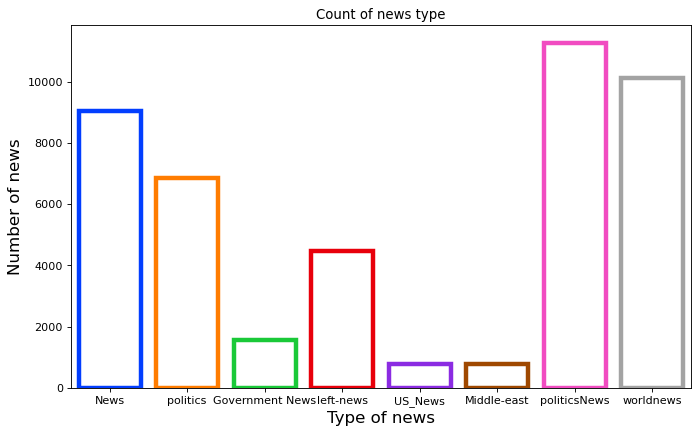

In [19]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
ax = sns.countplot(x="subject", data=df_marge,
                   facecolor=(0, 0, 0, 0),
                   linewidth=4,
                   edgecolor=sns.color_palette("bright", 8))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

 Notre ensemble Dataset contient plus d'actualités politiques que toute autre actualité suivie d'actualités mondiales

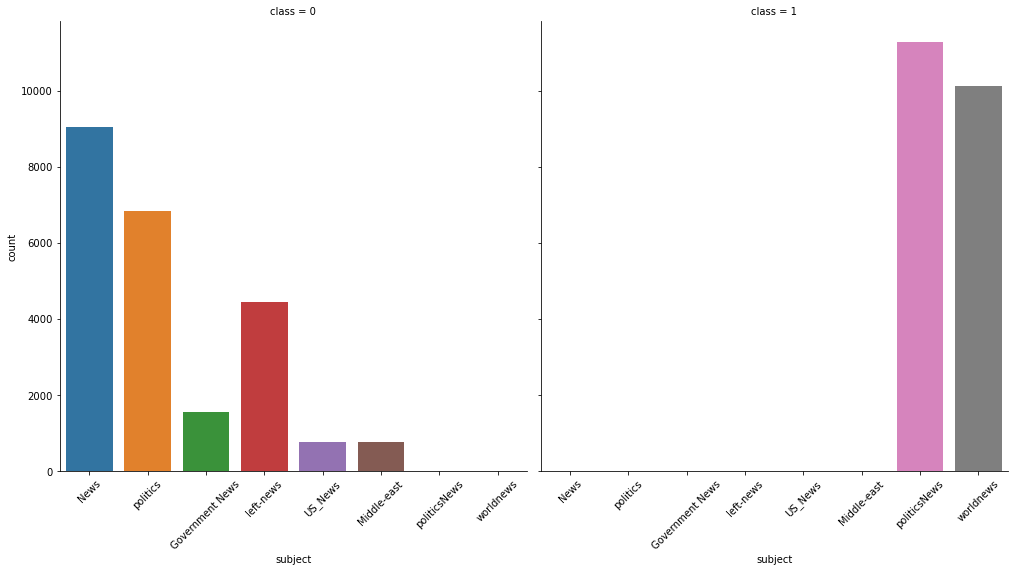

In [20]:
g = sns.catplot(x="subject", col="class",
                data=df_marge, kind="count",
                height=7, aspect=1)

#Rotating the xlabels
g.set_xticklabels(rotation=45)

Les fausses nouvelles sont partout dans la catégorie, sauf la politique et les nouvelles du monde
   

Les vraies nouvelles ne sont présentes que dans la politique et les nouvelles du monde et le compte est élevé

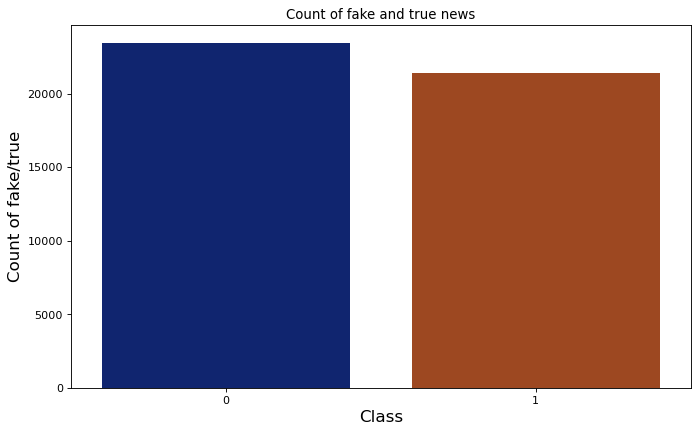

In [21]:
figure(figsize=(10, 6), dpi=80)
ax=sns.countplot(x="class", data=df_marge,palette="dark")

#Setting labels and font size
ax.set(xlabel='Class', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

Nous avons des données à peu près équilibrées


Lets extract more features from the news feature such as

Polarity: The measure which signifies the sentiment of th news
Review length: Length of the news(number of letters and spaces)
Word Count: Number of words in the news

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



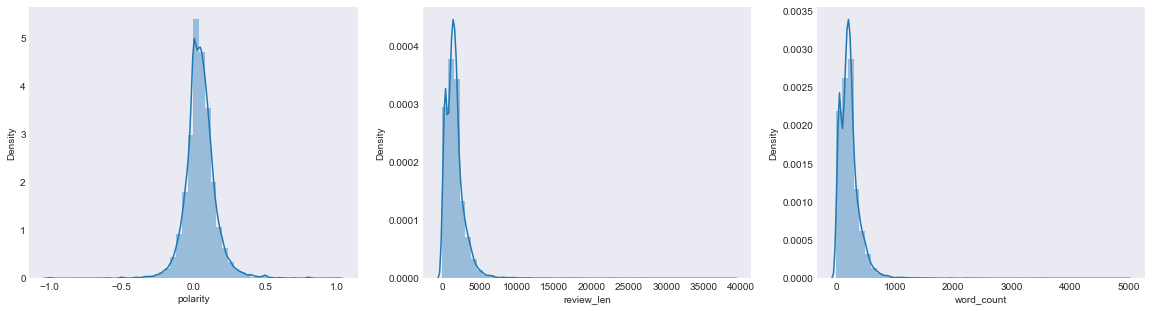

In [22]:
df_marge['polarity'] = df_marge['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df_marge['review_len'] = df_marge['text'].astype(str).apply(len)
df_marge['word_count'] = df_marge['text'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-dark')
plt.subplot(131)
sns.distplot(df_marge['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(df_marge['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(df_marge['word_count'])
fig = plt.gcf()

La plupart des polarités sont neutres, ni de mauvaises nouvelles ni de bonnes nouvelles

Le nombre de mots est compris entre 0-1000 et la longueur des nouvelles est comprise entre 0-5000 et quelques mots proches de 10000 qui pourraient être un article.

#  Examinons les 20 premiers mots des actualités 

In [23]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(df_marge['text'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)


trump 133835
said 132771
president 55837
would 55111
people 41798
one 37895
state 34425
also 31329
new 31251
reuters 29403
clinton 28639
obama 28145
donald 28104
government 27995
house 27738
states 26802
republican 25559
year 24965
could 23939
united 23561


In [24]:


#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['text','count'])

#Group by words and plot the sum

df1.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', color="#d902ee",title='Top 20 words in news')

Toutes les 20 principales nouvelles concernent le gouvernement américain

Top 20 trigrams in news

In [25]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(df_marge['text'], 20)

In [27]:
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])

#Grouping the words and plotting their frequencies
df2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in news')

Black lives matter parmis les nouvelles importantes qui ont gouverné les médias américains 

Le reste de l'actualité concerne la politique américaine

### Wordcloud fake News

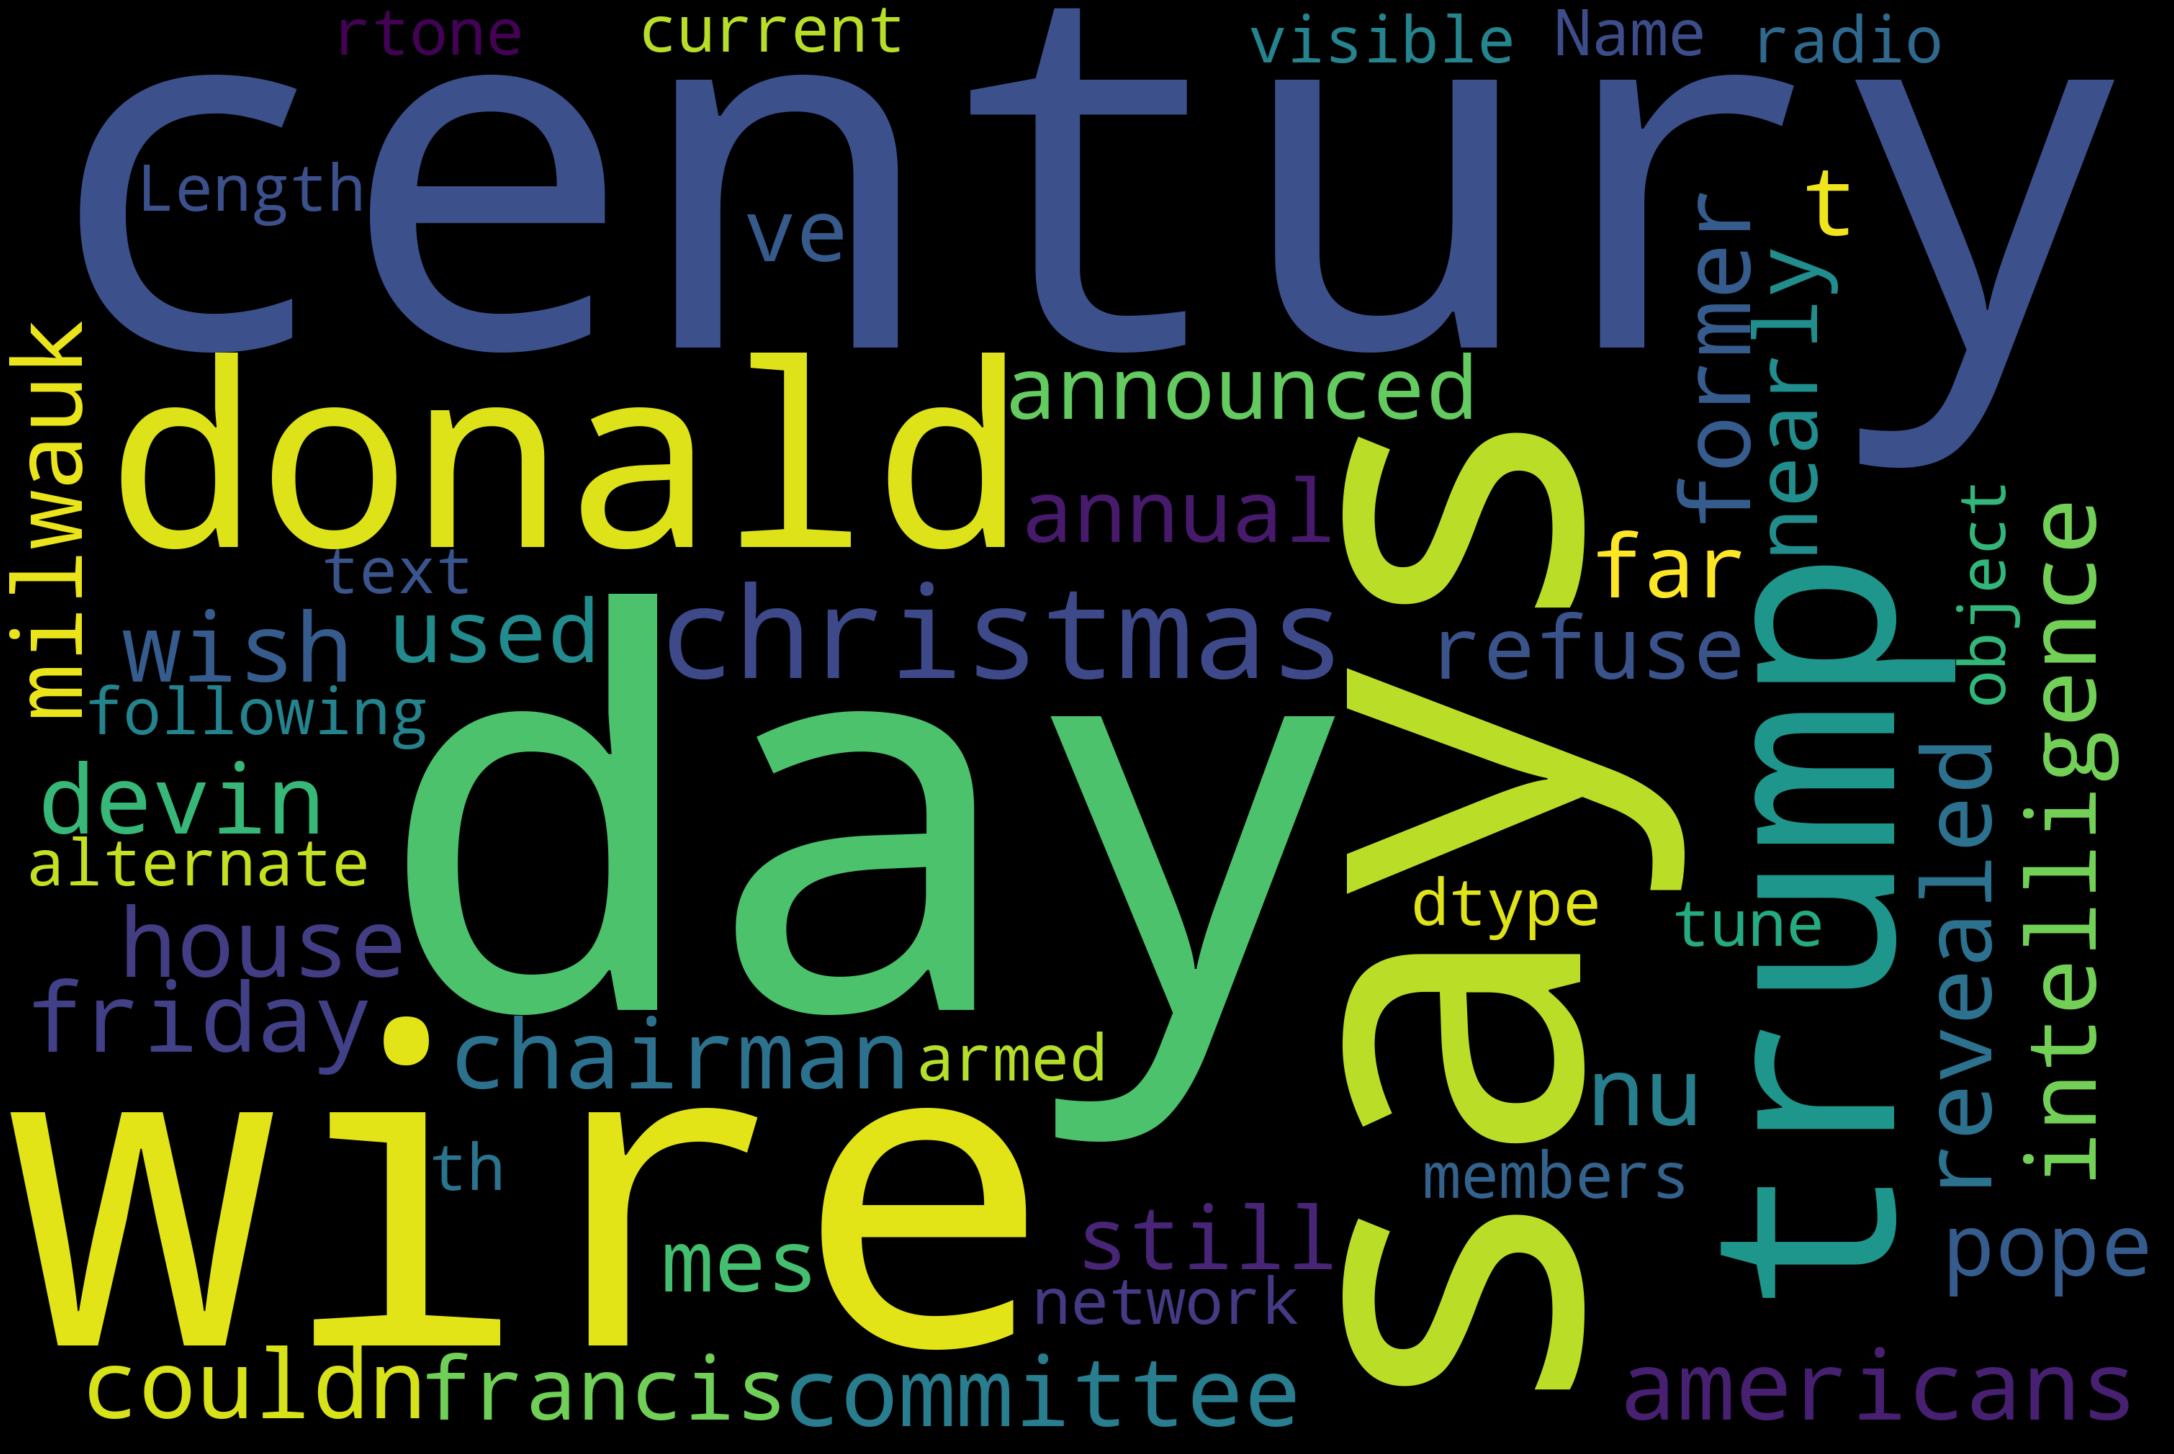

In [28]:
text = df_fake["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

La plupart des fausses nouvelles tournent autour de Donald Trump et de l'Amérique

### Wordcloud Real News

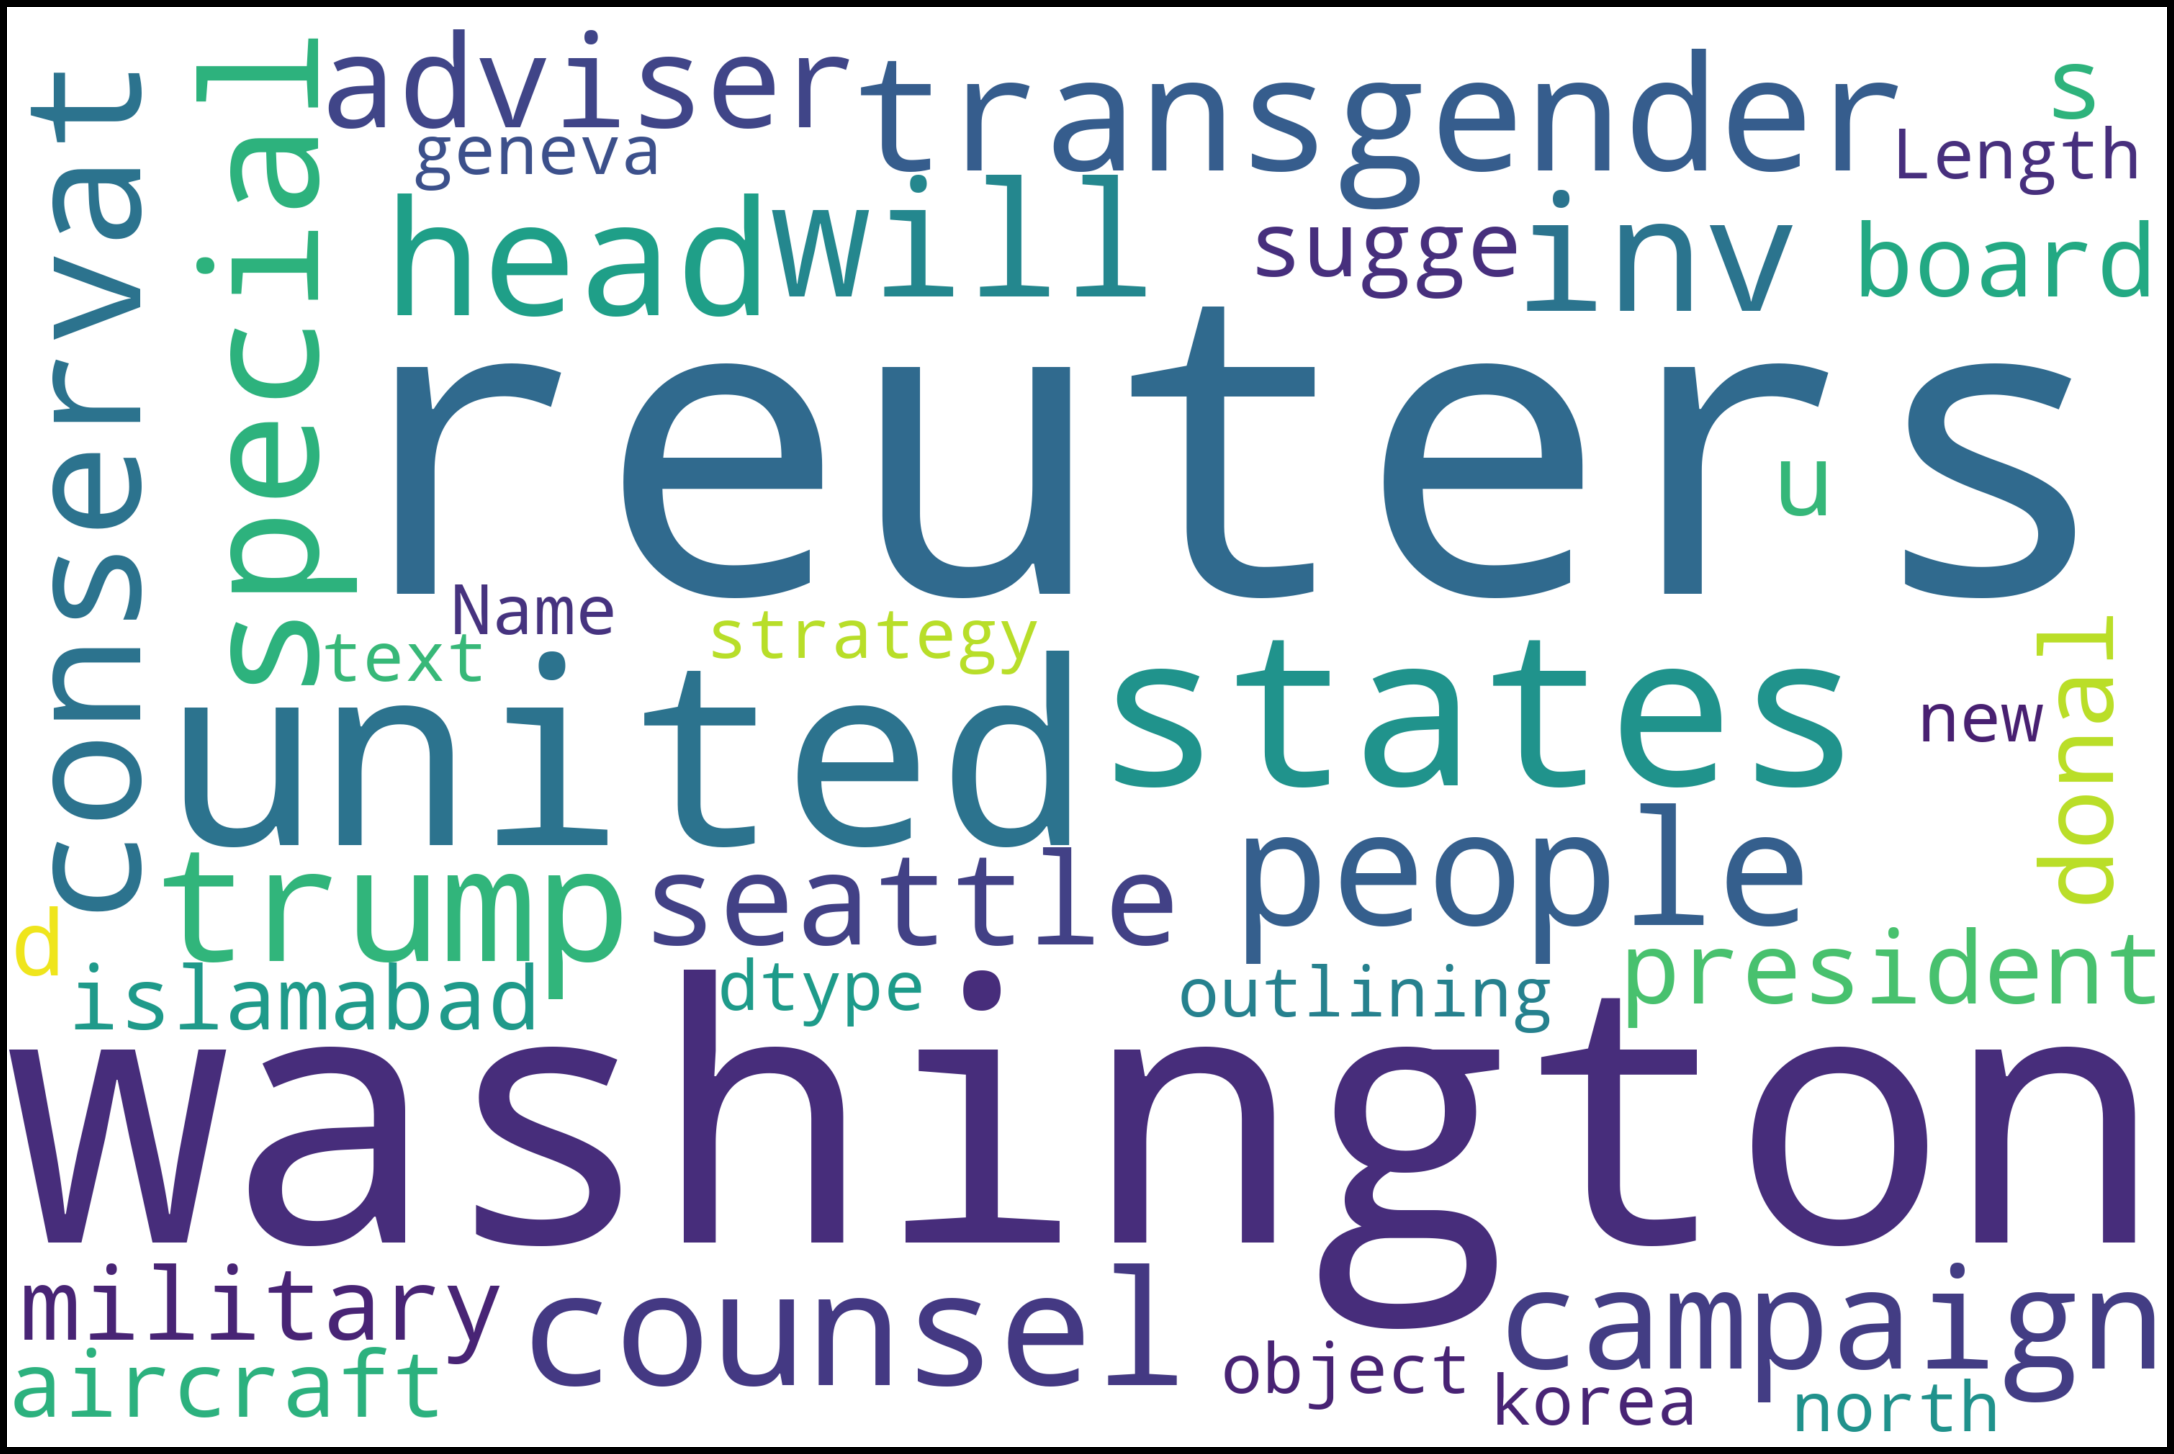

In [29]:
text = df_true["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Les vraies nouvelles n'impliquent pas beaucoup d'atouts à la place sur le Parti républicain et la Russie

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [19]:
df = df_marge.drop(["title", "subject","date"], axis = 1)


In [20]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [21]:
df.head()

,text,class
0,donald trump wish americans happy new year lea...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


#### Defining dependent and independent variable as x and y

In [22]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [26]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [27]:
y_train_predict_LR = LR.predict(xv_train)

In [28]:
y_test_predict_LR = LR.predict(xv_test)

### test d'existence de overfitting

In [29]:
from sklearn import metrics

acc = metrics.accuracy_score(y_train, y_train_predict_LR )
print("Train Accuracy : ",acc*100)

Train Accuracy :  99.09976825717511


In [30]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_test_predict_LR)
print("Test Accuracy : ",acc*100)

Test Accuracy :  98.68092691622104


### les valeurs de l accuracy de testing data et taraining sont tres proches donc cela nous assure qu il ne existe pas d overfitting

In [31]:
print(classification_report(y_test,y_test_predict_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5939
           1       0.98      0.99      0.99      5281

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

In [33]:
 y_score1 =LR.predict_proba(xv_test)[:,1]

In [34]:
  false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [35]:
print('roc_auc_score for LR: ', roc_auc_score(y_test, y_score1))

roc_auc_score for LR:  0.9990314329623788


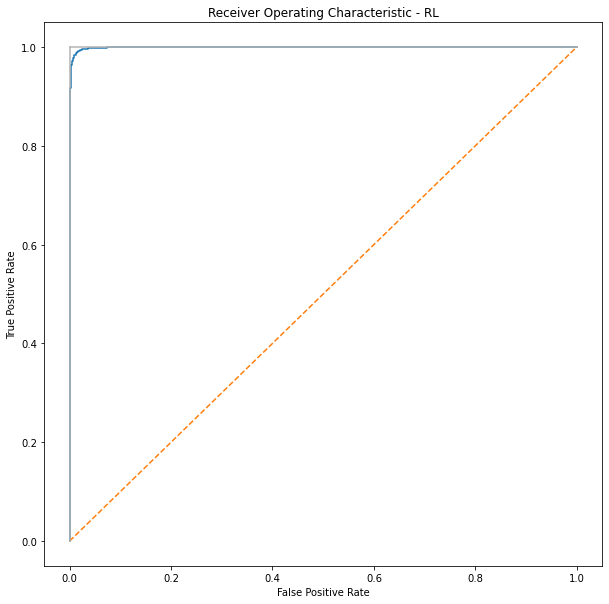

In [36]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RL')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2. Random Forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RF= RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
y_train_predict_RF =RF.predict(xv_train)

In [62]:
y_test_predict_RF = RF.predict(xv_test)

### test d'existence de overfitting

In [40]:
from sklearn import metrics

acc = metrics.accuracy_score(y_train, y_train_predict_RF)
print("Train Accuracy : ",acc*100)

Train Accuracy :  99.99702893814249


In [41]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_test_predict_RF)
print("Test Accuracy : ",acc*100)

NameError: name 'y_test_predict_RF' is not defined

### les valeurs de l accuracy de testing data et taraining sont tres proches donc cela nous assure qu il ne existe pas d overfitting

In [ ]:
print(classification_report(y_test,y_test_predict_RF))

roc_auc_score for RANDOM FOREST:  0.9997120571164411


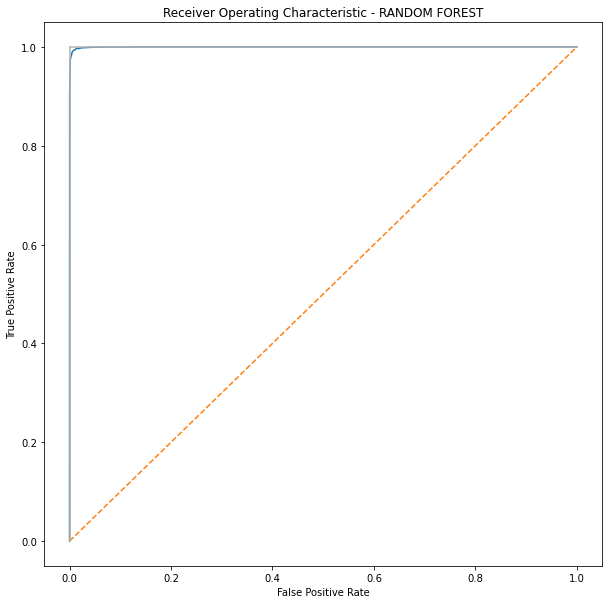

In [42]:
 y_RF = RF.predict_proba(xv_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_RF)
print('roc_auc_score for RANDOM FOREST: ', roc_auc_score(y_test, y_RF))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RANDOM FOREST')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3. SVM

In [43]:
from sklearn import svm

In [44]:
random_state = np.random.RandomState(0)

In [45]:
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state)

In [ ]:
svm.fit(xv_train,y_train)

In [98]:
y_train_predict_svm =svm.predict(xv_train)

In [99]:
y_test_predict_svm = svm.predict(xv_test)

### test d'existence de overfitting

In [100]:
from sklearn import metrics

acc = metrics.accuracy_score(y_train, y_train_predict_svm)
print("Train Accuracy : ",acc*100)

Train Accuracy :  99.83362053597956


In [101]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_test_predict_svm)
print("Test Accuracy : ",acc*100)

Test Accuracy :  99.42067736185383


In [102]:
print(classification_report(y_test,y_test_predict_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5836
           1       0.99      1.00      0.99      5384

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### les valeurs de l accuracy de testing data et taraining sont tres proches donc cela nous assure qu il ne existe pas d overfitting

# Model Testing With Manual Entry

### News

In [106]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "REAL News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_SVM = svm.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nSVM. Prediction: {}  \nRF Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_SVM[0]), 
                                                                                                              output_lable(pred_RF[0])))

In [118]:
news = str(input())
manual_testing(news)

"U.S., North Korea clash at U.N. arms forum on nuclear threat",geneva  reuters    north korea and the united states accused each other on tuesday of posing a nuclear threat  with pyongyang s envoy declaring it would never put its atomic arsenal up for negotiation  the debate at the united nations began when the u s  envoy said president donald trump s top priority was to protect the united states and its allies against the  growing threat  from north korea  to do so  he said  the country was ready to use  the full range of capabilities at our disposal   u s  ambassador robert wood told the conference on disarmament that the  path to dialogue still remains an option  for pyongyang  but that washington was  undeterred in defending against the threat north korea poses   fears have grown over north korea s development of missiles and nuclear weapons since pyongyang test launched intercontinental ballistic missiles  icbms  in july  those fears worsened after trump warned that north korea wo